##### In one hot encoding ,we divide the  categorical column into table in which we have each category as column. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
img=pltimg.imread('one-hotEncoding.png')

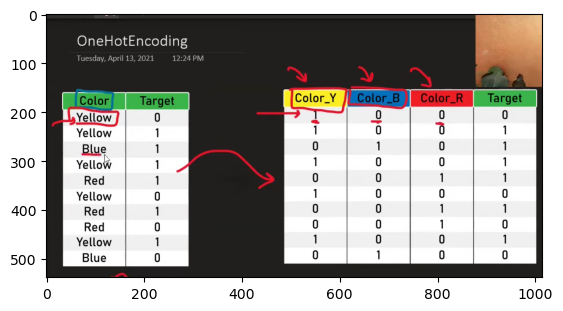

In [3]:
plt.imshow(img)

##### Hence ,we can see that,in one hot encoding we have converted string into kind of vector,where yellow represents [1,0,0] ,blue represents [0,1,0] and red represents [0,0,1].

##### After converting all such categories , we then remove one column from the cols which represents categories.Normally ,first column is eliminated every time.Fo e.g in above table ,yellow column will be eliminated.The reason for elimination of one column is multicolinearity which states that input column must not have any kind of dependencies/relation amongst themselves.

##### If number of categories are more , then converting each category into column will cause large dimension of data .Hence it will reduce our processing speed.To avoid this ,we only keep those catgories which are frequent,and the other catgeories are transformed into a new category ,say Others.By using this way,we can handle any number of categories.

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('cars.csv')

In [6]:
df.head(15)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
5,Hyundai,45000,Petrol,First Owner,440000
6,Maruti,175000,LPG,First Owner,96000
7,Maruti,5000,Petrol,Second Owner,45000
8,Toyota,90000,Diesel,First Owner,350000
9,Ford,169000,Diesel,First Owner,200000


In [8]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [10]:
df['brand'].nunique()

32

##### This mean that ,they are 32 unique categories in the column.


In [13]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [14]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

### 1. OneHotEncoding using Pandas

##### In pandas , we have a fucn get_dummies() which is used for one hot encoding.It takes 2 arguments ,one is dataframe and second  columns which is list of columns on which we want to apply one hot encoding.

In [15]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


##### To get column values as integer ,we can use dtype argument.

In [16]:
pd.get_dummies(df,columns=['fuel','owner'],dtype=int)

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


##### No ,we need to eliminate any column as per rules to avoid the multicolinearity.

### 2. K-1 OneHotEncoding

##### We use drop_first argument which is set to true to eliminate first column.

In [19]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True,dtype=int)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


##### Instead of using pandas ,we have a class in scikit learn which is more useful.

### 3. OneHotEncoding using Sklearn

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [21]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [24]:
from sklearn.preprocessing import OneHotEncoder

##### We then create a object of this class and pass arguments like drop to drop any column ,sparse which is set to False, and dtype which is set to to np.int32

In [28]:
ohe = OneHotEncoder(drop='first',dtype=np.int32)

##### Using one hot encoder will take more efforts ,coz we need to first sperate the columns where we want to apply one hot encoding and after its application, we need to merge it with remaining columns.The best soln for this hectic problem is column transformer ..which we will learn afterwards.

In [45]:
 X_train_new =ohe.fit_transform(X_train[['fuel','owner']]).toarray()


##### The above line produces a sparse matrix, we can use toarray() to convert it into array.

In [46]:
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()

##### Now ,we want to merge this two columns with remaining two columns which are brand and km_driven.For this ,we will use np.hstack method which merges the two array horizonatlly.Before that ,we will convert brand and km_driven columns into array using values attribute.

In [47]:
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

In [48]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [49]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

### 4. OneHotEncoding with Top Categories

##### We will now look to apply one hot encoding when number of categories are much more.

In [50]:
df['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [51]:
counts = df['brand'].value_counts()

##### Now will create a varaible called threshold which will store a number upto which catorgy is recognized as category.All the categories which have less value than threshold will be considered as in others section.

In [52]:
threshold=100

##### Now ,we will find the names of those categories which have value less than threshold.

In [55]:
counts[counts <= threshold].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [56]:
repl=counts[counts <= threshold].index

##### Now, we will replace the occurences of such categories with uncommon catgeory.

In [58]:
pd.get_dummies(df['brand'].replace(repl,'uncommon'),dtype=int)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
